In [1]:
import numpy as np
import pandas as pd
import pyarrow as pa
import pyarrow.parquet as pq
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns
import matplotlib.lines as mlines

C:\Users\natha\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\natha\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
C:\Users\natha\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [20]:
df = pd.read_parquet("basic_taxi_df_cleaned_100624.parquet")
df.head()

,taxi_zone,datetime,passenger_count,year_month,day,week,hour,company
0,4,2023-06-01 00:00:00,31.0,2023-06,1,Thursday,0,Yellow/Green Taxi
1,4,2023-06-01 01:00:00,12.0,2023-06,1,Thursday,1,Yellow/Green Taxi
2,4,2023-06-01 02:00:00,9.0,2023-06,1,Thursday,2,Yellow/Green Taxi
3,4,2023-06-01 03:00:00,2.0,2023-06,1,Thursday,3,Yellow/Green Taxi
4,4,2023-06-01 04:00:00,1.0,2023-06,1,Thursday,4,Yellow/Green Taxi


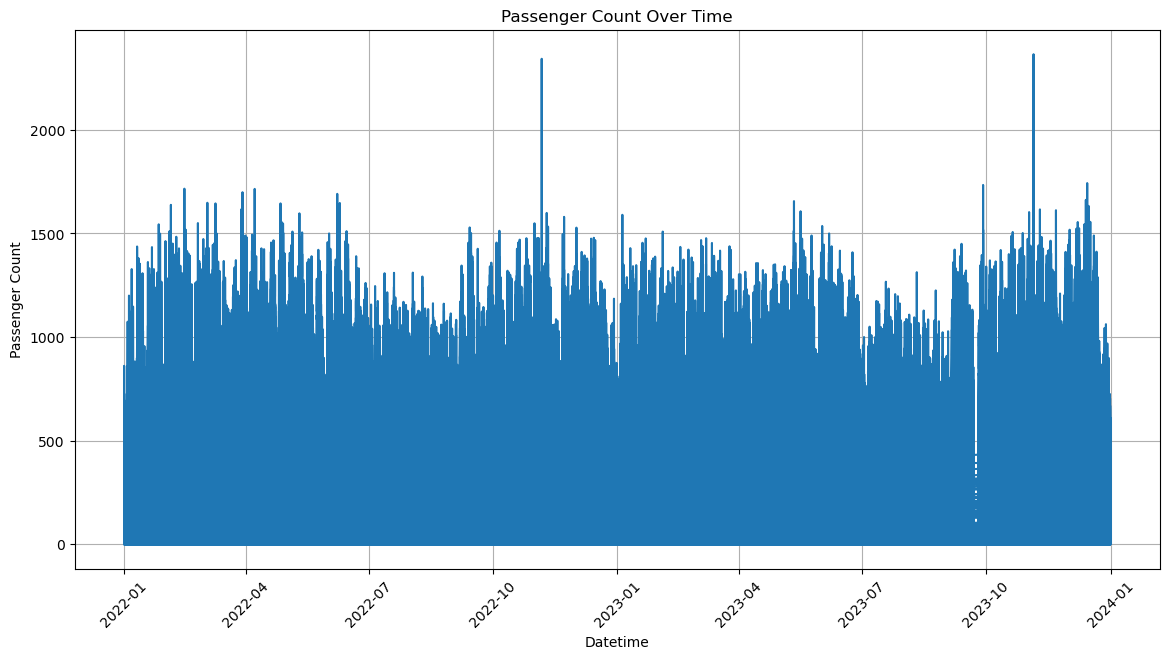

In [18]:
# 1. Passenger count over time for each company
plt.figure(figsize=(14, 7))
plt.plot(df['datetime'], df['passenger_count'])
plt.title('Passenger Count Over Time')
plt.xlabel('Datetime')
plt.ylabel('Passenger Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

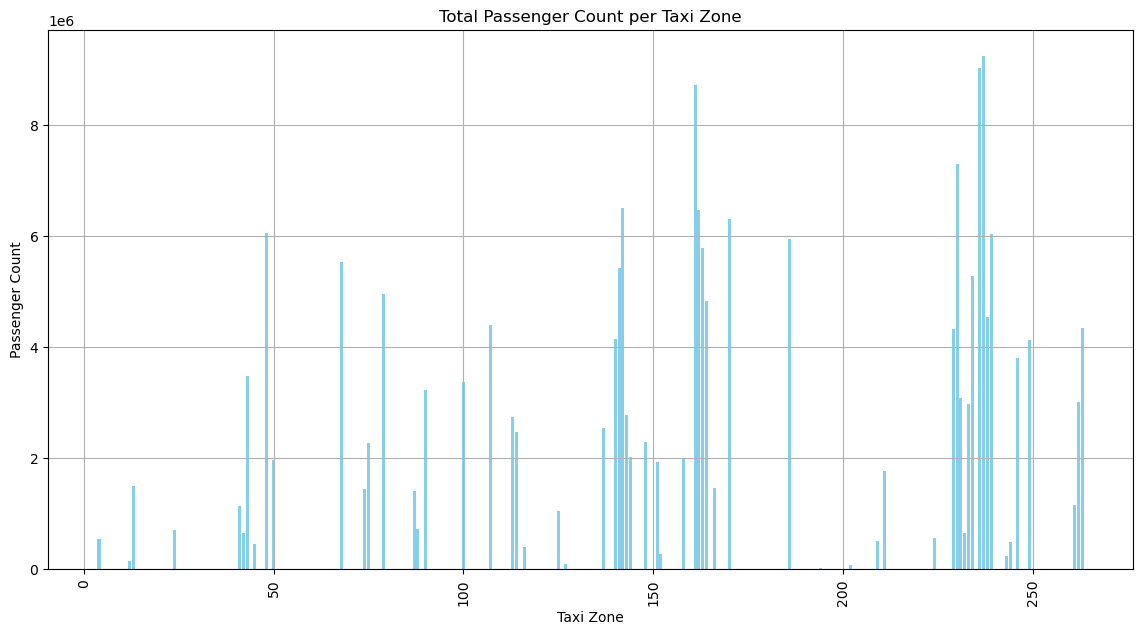

In [21]:
# 2. Total passenger count per taxi zone
plt.figure(figsize=(14, 7))
taxi_zone_counts = df.groupby('taxi_zone')['passenger_count'].sum().reset_index()
plt.bar(taxi_zone_counts['taxi_zone'], taxi_zone_counts['passenger_count'], color='skyblue')
plt.title('Total Passenger Count per Taxi Zone')
plt.xlabel('Taxi Zone')
plt.ylabel('Passenger Count')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

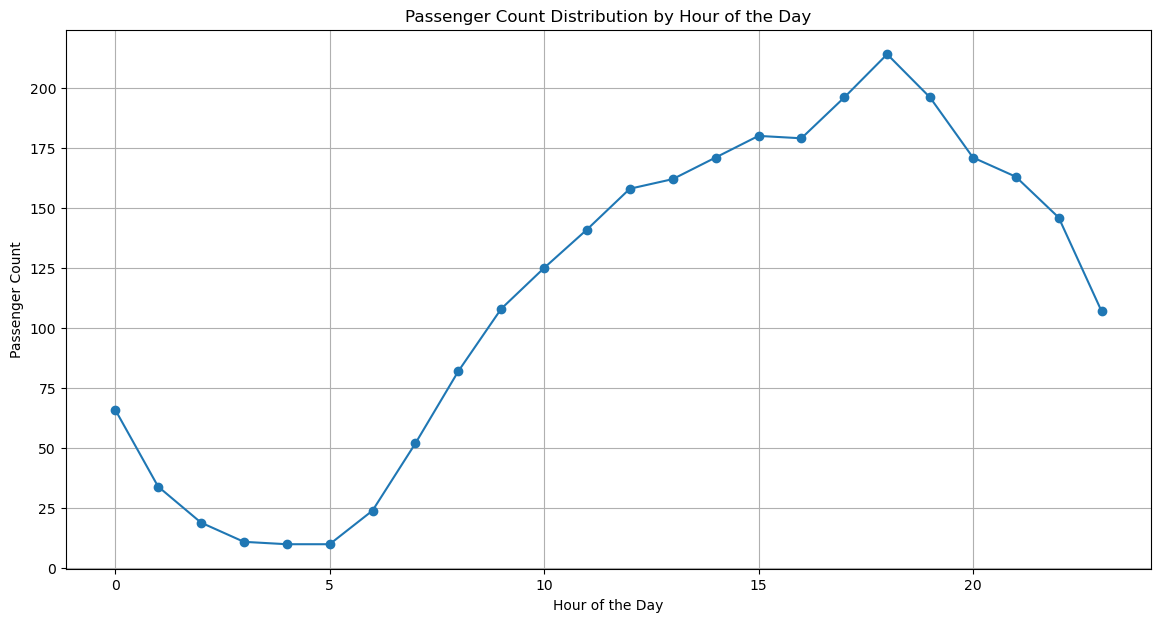

In [22]:
# 3. Passenger count distribution by hour of the day
plt.figure(figsize=(14, 7))
hours = df['hour'].unique()
hours.sort()
counts_by_hour = df.groupby('hour')['passenger_count'].median().reindex(hours)
plt.plot(hours, counts_by_hour, marker='o')
plt.title('Passenger Count Distribution by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Passenger Count')
plt.grid(True)
plt.show()

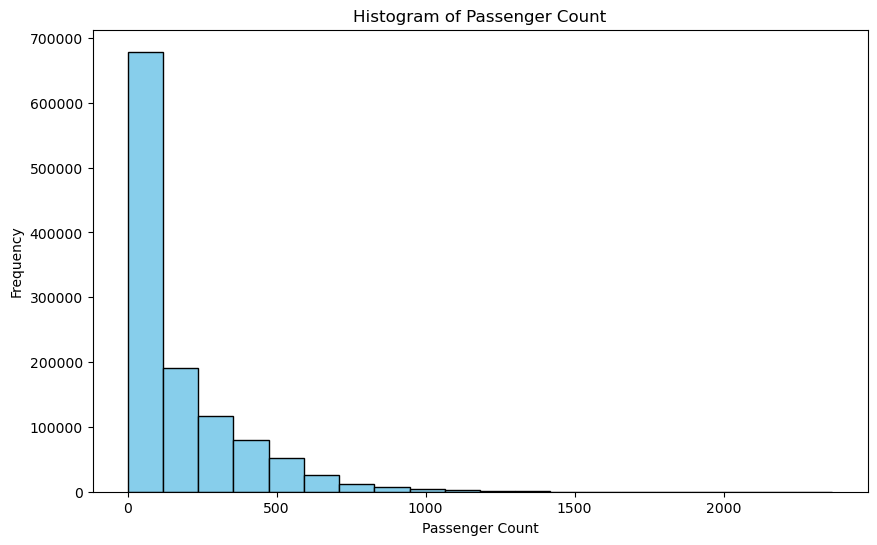

In [23]:
# 4. Histogram of Passenger Count
plt.figure(figsize=(10, 6))
plt.hist(df['passenger_count'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Frequency')
plt.show()

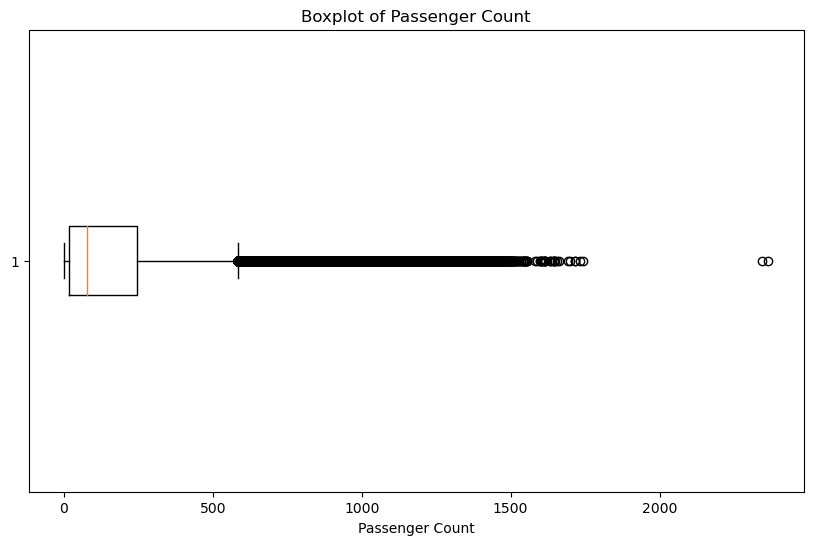

In [24]:
# 5. Boxplot of Passenger Count
plt.figure(figsize=(10, 6))
plt.boxplot(df['passenger_count'], vert=False)
plt.title('Boxplot of Passenger Count')
plt.xlabel('Passenger Count')
plt.show()

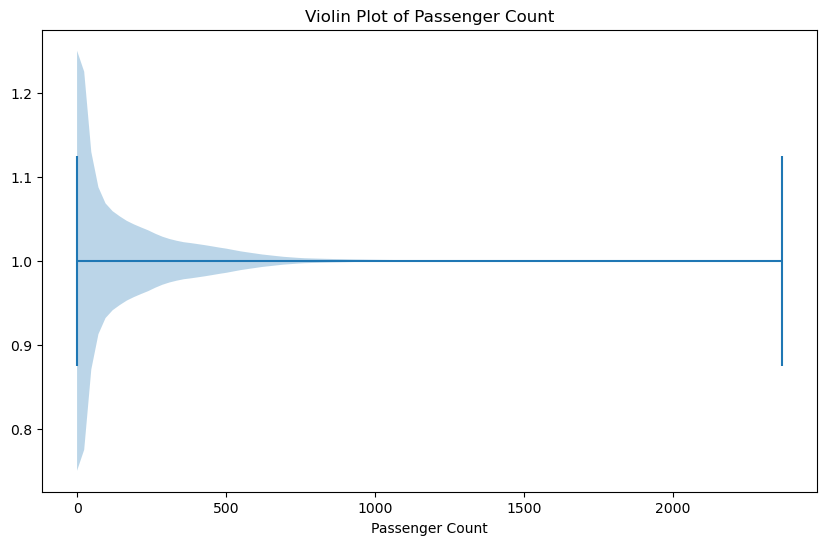

In [25]:
# 6. Violin Plot of Passenger Count
plt.figure(figsize=(10, 6))
plt.violinplot(df['passenger_count'], vert=False)
plt.title('Violin Plot of Passenger Count')
plt.xlabel('Passenger Count')
plt.show()

C:\Users\natha\AppData\Local\Temp\ipykernel_40684\4156567918.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('week')['passenger_count'].sum().plot(kind='bar', color='skyblue')


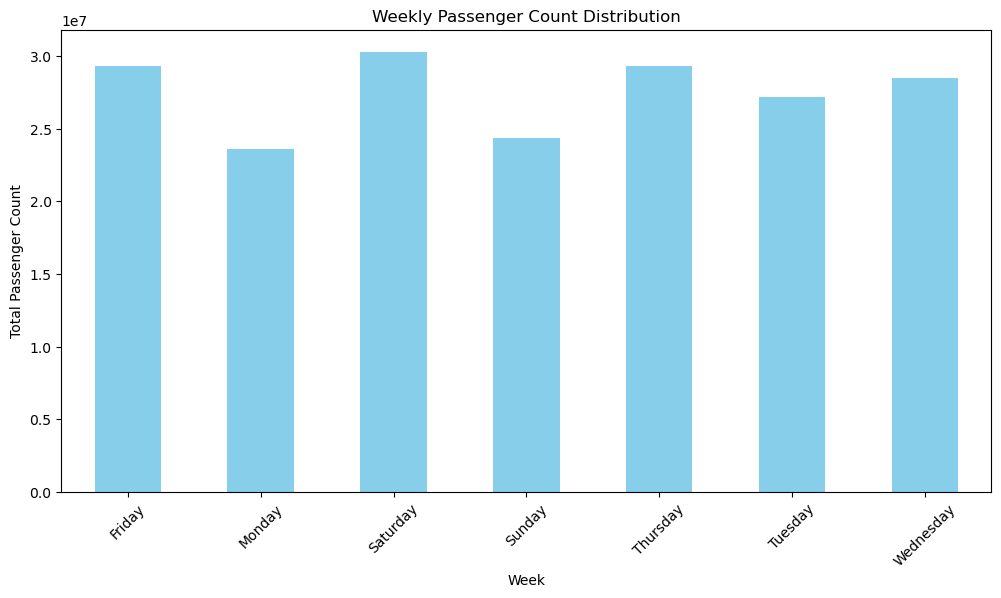

In [26]:
# 7. Weekly Passenger Count Distribution
plt.figure(figsize=(12, 6))
df.groupby('week')['passenger_count'].sum().plot(kind='bar', color='skyblue')
plt.title('Weekly Passenger Count Distribution')
plt.xlabel('Week')
plt.ylabel('Total Passenger Count')
plt.xticks(rotation=45)
plt.show()

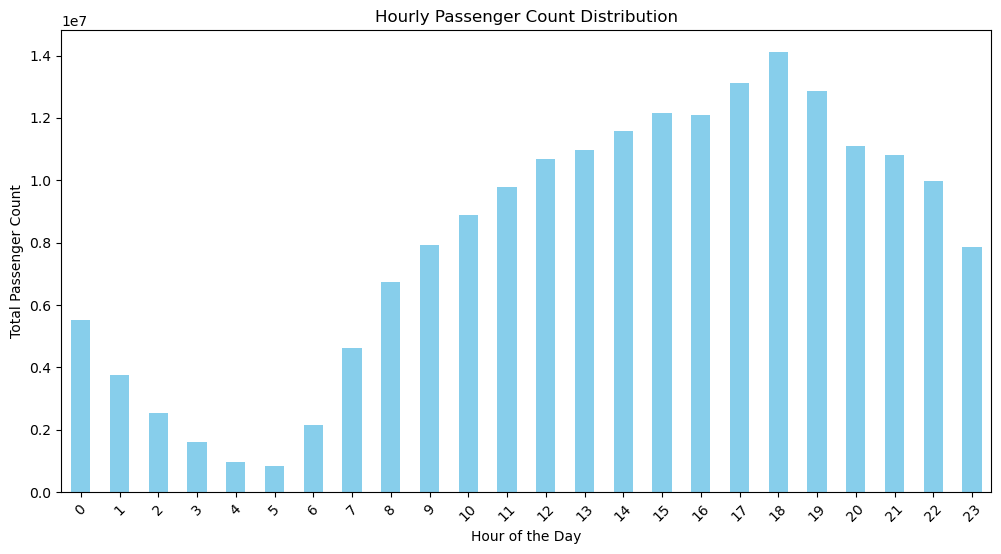

In [27]:
# 8. Hourly Passenger Count Distribution
plt.figure(figsize=(12, 6))
df.groupby('hour')['passenger_count'].sum().plot(kind='bar', color='skyblue')
plt.title('Hourly Passenger Count Distribution')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Passenger Count')
plt.xticks(rotation=45)
plt.show()

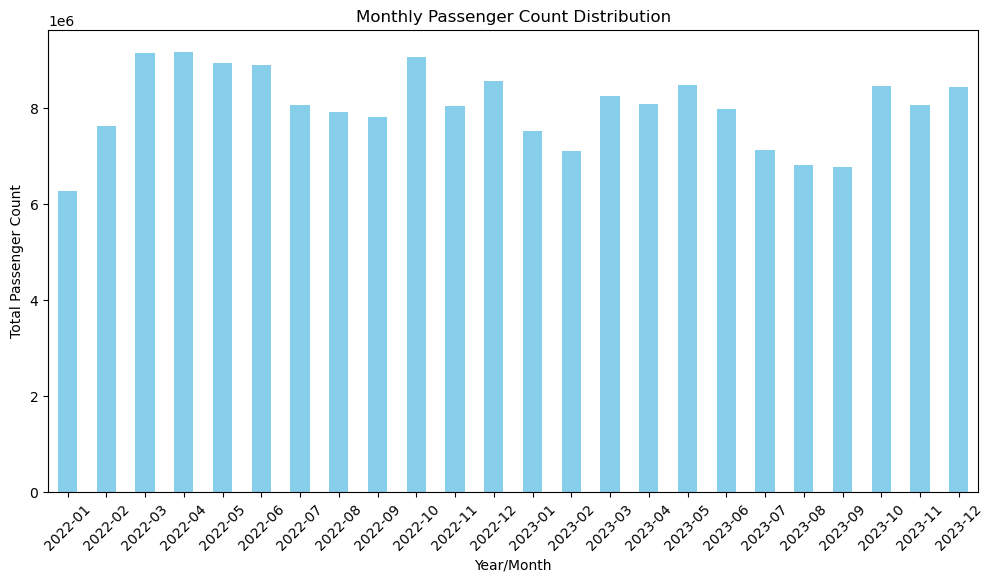

In [29]:
# 9. Monthly Passenger Count Distribution
plt.figure(figsize=(12, 6))
df.groupby('year_month')['passenger_count'].sum().plot(kind='bar', color='skyblue')
plt.title('Monthly Passenger Count Distribution')
plt.xlabel('Year/Month')
plt.ylabel('Total Passenger Count')
plt.xticks(rotation=45)
plt.show()